In [1]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

In [2]:
sentinels = {'PRECIP': ['Nulo'],'EVAP':['Nulo'],'TMAX':['Nulo'],'TMIN':['Nulo']}

In [3]:
df0 = pd.read_csv('asc.txt', skiprows=20, sep='\s+',header=None,names=["FECHA","PRECIP","EVAP","TMAX","TMIN"],na_values=sentinels,skipfooter=1,engine='python')

In [4]:
#Definiendo el dataframe
df = pd.DataFrame(df0)

In [5]:
df['FECHAS'] =  pd.to_datetime(df['FECHA'])
df = df.drop(['FECHA'], 1)

In [6]:
df.dtypes

PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
FECHAS    datetime64[ns]
dtype: object

In [7]:

#Mostrando descripción del data frame
df.describe()

PRECIP         EVAP          TMAX          TMIN
count  15983.000000  4920.000000  12582.000000  12596.000000
mean       0.556103     7.440447     26.324408      8.820586
std        2.907258     3.905089      8.377540      7.501181
min        0.000000     0.100000      0.000000    -16.000000
25%        0.000000     4.400000     20.000000      3.000000
50%        0.000000     7.100000     27.500000     10.000000
75%        0.000000    10.100000     32.000000     15.000000
max       58.000000    17.900000     55.000000     29.000000

In [9]:
#Definiendo columnas de año y mes
df['MES'] = df['FECHAS'].dt.month
df['AÑO'] = df['FECHAS'].dt.year
df.head()

PRECIP  EVAP  TMAX  TMIN     FECHAS  MES   AÑO
0     0.0   1.2  10.0  -7.0 1967-01-01    1  1967
1     0.0   4.5  15.0  -7.0 1967-02-01    2  1967
2     0.0   4.2  13.0  -9.0 1967-03-01    3  1967
3     0.0   3.9  10.0 -10.0 1967-04-01    4  1967
4     0.0   4.0  13.0 -10.0 1967-05-01    5  1967

In [10]:
#Buscando el número de años
NumA = len(df['AÑO'].unique())
NumA

45

In [11]:
#Haciendo arreglo de meses y de años
init = 1980
AÑOS = [init + i for i in range(0, NumA)]
init2 = 1
MESES = [init2 + i for i in range(0, 12)]

In [12]:
#Calculando promedio de precipitaciones y temperaturas mensuales
PRECIPPROPMES = [df[df.MES==(init2 + i)].PRECIP.sum()/NumA for i in range (0,12)]
TMAXPROMMES = [df[df.MES==(init2 + i)].TMAX.mean() for i in range (0,12)]
TMINPROMMES = [df[df.MES==(init2 + i)].TMIN.mean() for i in range (0,12)]

TMINPROMMES

[3.632864674868191,
 5.183621566632756,
 6.023476702508961,
 8.08907788719785,
 10.91276408450704,
 13.314592658907788,
 13.88900432900433,
 13.255913043478262,
 11.270009115770286,
 7.80183908045977,
 5.455726092089727,
 4.355747126436782]

In [13]:
#Creando data frame para datos mensuales
d = {'MES': MESES , 'PRECIPPROPMES':PRECIPPROPMES,'TMAXPROMMES': TMAXPROMMES,'TMINPROMMES': TMINPROMMES }
dmes = pd.DataFrame(data=d)
dmes

MES  PRECIPPROPMES  TMAXPROMMES  TMINPROMMES
0     1      11.915556    20.412070     3.632865
1     2      12.824444    22.511519     5.183622
2     3      12.346667    24.208400     6.023477
3     4       9.973333    26.354987     8.089078
4     5      11.251111    29.296293    10.912764
5     6       9.675556    32.135907    13.314593
6     7      44.660000    30.910783    13.889004
7     8      29.682222    30.144241    13.255913
8     9      16.357778    28.686355    11.270009
9    10      14.342222    25.500230     7.801839
10   11      11.975556    22.497400     5.455726
11   12      12.511111    20.224828     4.355747

In [14]:
#Calculando promedio de precipitaciones y temperaturas anuales
PRECIPPROPAÑO = [df[df.AÑO==(init + i)].PRECIP.sum()/NumA for i in range (0,NumA)]
TMAXPROMAÑO = [df[df.AÑO==(init + i)].TMAX.mean() for i in range (0,NumA)]
TMINPROMAÑO = [df[df.AÑO==(init + i)].TMIN.mean() for i in range (0,NumA)]

In [15]:
#Creando data frame para datos anuales
d = {'AÑO': AÑOS , 'PRECIPPROPAÑO':PRECIPPROPAÑO,'TMAXPROMAÑO': TMAXPROMAÑO,'TMINPROMAÑO': TMINPROMAÑO }
daño = pd.DataFrame(data=d)
daño

AÑO  PRECIPPROPAÑO  TMAXPROMAÑO  TMINPROMAÑO
0   1980       2.062222    26.934307     9.671533
1   1981       7.622222    26.144689    10.494505
2   1982       4.188889    32.336842    14.756614
3   1983       3.484444    13.459459    -1.921053
4   1984       3.755556          NaN          NaN
5   1985       3.533333    31.980392    16.754902
6   1986       6.177778    27.031136    10.644689
7   1987       2.855556    27.288538    10.017717
8   1988       2.477778    27.291971     9.375912
9   1989       4.824444    29.842491     9.915751
10  1990       6.428889    27.743590    10.271062
11  1991       8.340000    25.657534     7.382466
12  1992      11.444444    25.262295     8.403552
13  1993       6.808889    25.616438     9.398082
14  1994       1.933333    38.500000     9.691667
15  1995       0.955556    38.117871     7.330579
16  1996       2.511111    34.473485     8.373626
17  1997       6.000000    27.155769     9.620818
18  1998       2.733333    27.510549     6.766255
19  1999       5.662222    25.380556     8.075833
20  2000       0.000000          NaN          NaN
21  2001       0.000000          NaN          NaN
22  2002       0.000000          NaN          NaN
23  2003       1.644444    27.623967    10.247934
24  2004       7.644444    25.098361     8.715847
25  2005       4.888889    25.453297    12.189560
26  2006      10.222222    24.698630    12.813699
27  2007       0.088889    23.377358    12.854447
28  2008       0.155556    25.002732    10.021858
29  2009       0.000000    24.360882     8.465565
30  2010       0.000000    25.564738     7.927473
31  2011       0.000000    30.213115    11.196721
32  2012       0.000000          NaN          NaN
33  2013       0.000000          NaN          NaN
34  2014       0.000000          NaN          NaN
35  2015       0.000000          NaN          NaN
36  2016       0.000000          NaN          NaN
37  2017       0.000000          NaN          NaN
38  2018       0.000000          NaN          NaN
39  2019       0.000000          NaN          NaN
40  2020       0.000000          NaN          NaN
41  2021       0.000000          NaN          NaN
42  2022       0.000000          NaN          NaN
43  2023       0.000000          NaN          NaN
44  2024       0.000000          NaN          NaN

In [16]:
#Creando arreglo con labels de mes
MESESlabel = calendar.month_name[1:13]

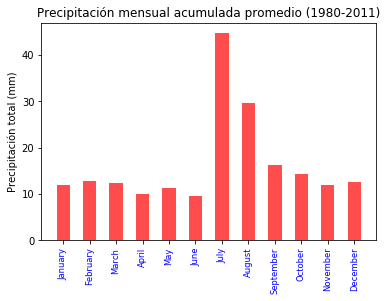

In [19]:
#Creando gráfica para precipitación mensual acumulada promedio
X = MESESlabel
N = np.arange(len(X))
Y = PRECIPPROPMES 
 
plt.bar(N, Y,  width=0.5,align='center', alpha=0.7,color='r')
plt.xticks(N, X, size = 'small', color = 'b', rotation = 90)
plt.ylabel('Precipitación total (mm)')
plt.title('Precipitación mensual acumulada promedio (1980-2011)')
plt.savefig('Precip_mensual',plt=2000)
plt.show()

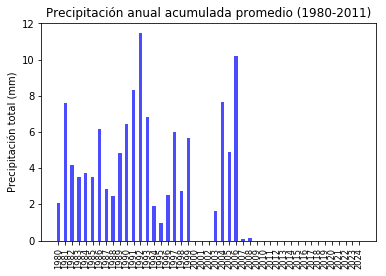

In [20]:
#Creando gráfica para precipitación mensual acumulada promedio
X = AÑOS
N = np.arange(len(X))
Y = PRECIPPROPAÑO 
 
plt.bar(N, Y,  width=0.5,align='center', alpha=0.7,color='b')
plt.xticks(N, X, size = 'small', color = 'k', rotation = 90)
plt.ylabel('Precipitación total (mm)')
plt.title('Precipitación anual acumulada promedio (1980-2011)')
plt.savefig('Precip_anual',plt=2000)
plt.show()

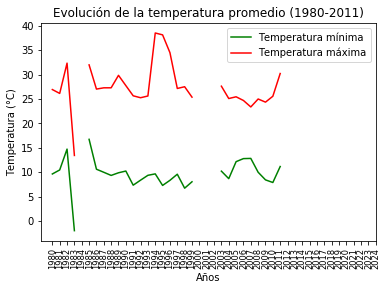

In [23]:
#Creando gráfica para precipitación mensual acumulada promedio
X = AÑOS
N = np.arange(len(X))
Y1 = TMINPROMAÑO
Y2 = TMAXPROMAÑO
 
plt.plot(Y1, label = "Temperatura mínima", color = 'g')   
plt.plot(Y2, label = "Temperatura máxima", color = 'r')

plt.xlabel("Años")   
plt.ylabel("Temperatura (°C)")  

plt.xticks(N, X, size = 'small', color = 'k', rotation = 90)

plt.legend()
plt.title('Evolución de la temperatura promedio (1980-2011)')
plt.savefig('Temp_anual',plt=2000)
plt.show()

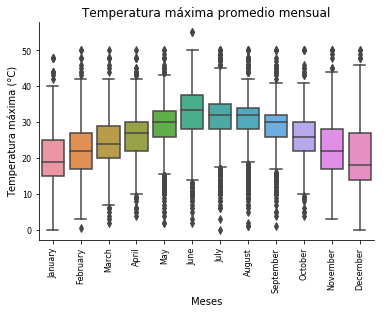

In [24]:
#Diagrama de caja de la temperatura máxima promedio mensual
box = sns.boxplot(x="MES", y="TMAX", data=df)
box.set( xlabel= 'Meses', ylabel= 'Temperatura máxima (°C)')
box.set_xticklabels(MESESlabel, rotation=90 )
box.tick_params(labelsize=8)
sns.despine()
plt.title('Temperatura máxima promedio mensual')
plt.savefig('CajaMAX_mensual',plt=2000)
plt.show()

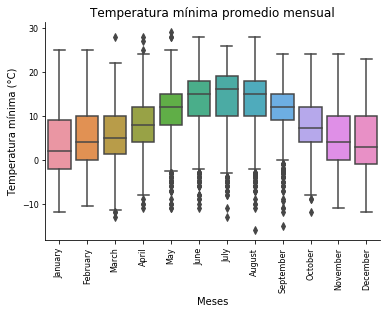

In [25]:
#Diagrama de caja de la temperatura mínima promedio mensual
box = sns.boxplot(x="MES", y="TMIN", data=df)
box.set( xlabel= 'Meses', ylabel= 'Temperatura mínima (°C)')
box.set_xticklabels(MESESlabel, rotation=90 )
box.tick_params(labelsize=8)
sns.despine()
plt.title('Temperatura mínima promedio mensual')
plt.savefig('CajaMIN_mensual',plt=2000)
plt.show()

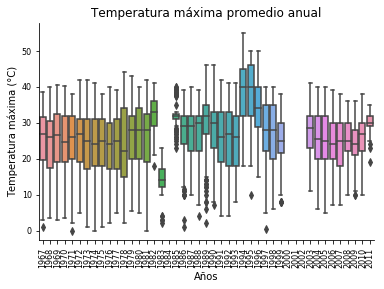

In [26]:

#Diagrama de caja de la temperatura máxima promedio anual
box = sns.boxplot(x="AÑO", y="TMAX", data=df)
box.set( xlabel= 'Años', ylabel= 'Temperatura máxima (°C)')
box.set_xticklabels(box.get_xticklabels(), rotation=90 )
box.tick_params(labelsize=8)
sns.despine()
plt.title('Temperatura máxima promedio anual')
plt.savefig('CajaMAX_anual',plt=2000)
plt.show()

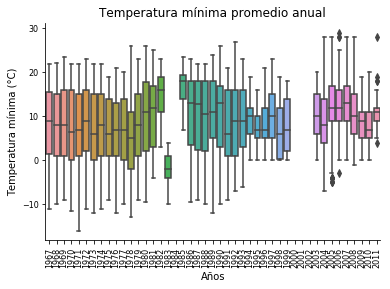

In [28]:
#Diagrama de caja de la temperatura mínima promedio anual
box = sns.boxplot(x="AÑO", y="TMIN", data=df)
box.set( xlabel= 'Años', ylabel= 'Temperatura mínima (°C)')
box.set_xticklabels(box.get_xticklabels(), rotation=90 )
box.tick_params(labelsize=8)
sns.despine()
plt.title('Temperatura mínima promedio anual')
plt.savefig('CajaMIN_anual',plt=2000)
plt.show()

In [ ]:
#Creando data frame para datos mensuales
##labels = MESESlabel
#d = {'AÑOS': AÑOS, 'PRECIPPROPAÑO':PRECIPPROPAÑO,'TMAXPROMAÑO': TMAXPROMAÑO,'TMINPROMAÑO': TMINPROMAÑO }
#TMAXMES = [df[df.MES==(init2 + i)].TMAX() for i in range (0,12)]
#dmesetem = pd.DataFrame(data=d)
#dmesetem
#TMAXMES



#for i in range (0,12):
#    TMAXMES[i] = [df.MES==(init2 + i).TMAX()] 



#TMINPROMMES = [df[df.MES==(init2 + i)].TMIN.mean() for i in range (0,12)]
#TMINPROMMES
TMAXMES=[]
for i in range (0,12):
    TMAXMES.append( df[df.MES==i].TMAX)
    
TMAXMES

In [29]:

import matplotlib.pyplot as plt
import numpy as np

# Random test data
#np.random.seed(19680801)
all_data = dmes
labels = ['1', '2', '3','4','5','6','7','8','9','10','11','12']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = axes[0].boxplot(all_data,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[0].set_title('Rectangular box plot')

# notch shape box plot
bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[1].set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()

In [ ]:
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
all_data

In [30]:
p1 = [1,2,3,4,5]
#p2 = [6,7,8,9,10]
#p3 = [11,12,13,14,15]
m =[]
#for i in range(1,4):

#exec('m.append(p{})'.format(i)) 
m.append(p1)
m

#inicial = 1

#mes1=[]
#mes2=[]

#mes1=df[df.MES==1].TMAX
#mes2=df[df.MES==2].TMAX
#for i in range(1,13):
#mesestmax=[]

#mesestmax.append(mes1)
#mesestmax.append(mes2)
#mesestmax

#mesestmax



#meses =[]
#for i in range(1,4):
 #  exec('meses.append(p{})'.format(i)) 
#meses

[[1, 2, 3, 4, 5]]

In [31]:
#mes1=[df[df.MES==1].TMAX]
#Creando data frame para datos mensuales
#d = {'MES': MESES , 'TMAX':mes1[0] }
#dmes = pd.DataFrame(data=d)
#dmes
#mes1
#mes2=df[df.MES==2].TMAX
#for i in range(1,13):
#mesestmax=[]

#mesestmax.append(mes1)
#mesestmax.append(mes2)
#mesestmax

#df.loc[:,'MES']
mes1 = df[df['MES'] ==1]['TMAX']
mes1

0        10.0
12       18.0
13       18.5
14       18.0
15       19.0
16       23.0
17       16.0
18       17.5
19       16.0
20       23.0
21       23.0
22       24.0
23       20.5
24       19.0
25       18.0
26       14.0
27       17.5
28       19.0
29       25.0
30       24.0
31       18.0
59       11.0
90       25.0
120      22.5
151      31.5
181      37.0
212      35.5
243      22.0
273      32.0
304      24.0
         ... 
15574    17.0
15575    20.0
15576    22.0
15577    20.0
15578    16.0
15579    19.0
15580    19.0
15581    18.0
15582    19.0
15583    15.0
15584    13.0
15585    10.0
15586    11.0
15587    12.0
15588    21.0
15589    23.0
15617    23.0
15648    22.0
15678    28.0
15709    32.0
15739    28.0
15770    28.0
15801    20.0
15831    25.0
15862    25.0
15892    15.0
15923     NaN
15951    32.0
15982    30.0
16012     NaN
Name: TMAX, Length: 1307, dtype: float64